In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [60]:
job="business_analyst"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [61]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Norstella,BI Developer,Remote,0.0,"Power BI, Data modeling, Azure, Business intel...",3.4,Business Analyst
1,[x]cube LABS,Business Analyst Trainee,Hyderābād,500000.0,"Business analysis, English, Microsoft Office, ...",4.4,Business Analyst
2,Serole Technologies,IT Business Analyst,Hyderābād,650000.0,"Business analysis, Software development, Agile...",3.8,Business Analyst
3,[x]cube LABS,Power BI Developer,Hyderābād,600000.0,"Power BI, Azure, Business intelligence, CSS, M...",4.4,Business Analyst
4,Lampros Tech,Business Analyst,Ahmedabad,450000.0,"Business analysis, Project management, Agile, ...",4.3,Business Analyst


In [62]:
df.isnull().sum()

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                   10
company_rating           60
standardized_job_role     0
dtype: int64

In [63]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [64]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Norstella,BI Developer,Remote,0.0,"Power BI, Data modeling, Azure, Business intel...",3.4,Business Analyst
6,Appventurez Mobitech,Business Analyst,Noida,0.0,"Azure, iOS, Google Cloud Platform, AWS, Qualit...",NaN,Business Analyst
8,Optum,Business Analyst,Noida,0.0,"Power BI, Business intelligence, Tableau, SQL,...",NaN,Business Analyst
18,"Optum Global Solutions, UHG",Senior Business Analyst,Gurgaon,0.0,"Power BI, Azure, Business intelligence, Altery...",NaN,Business Analyst
19,ADCI HYD 16 SEZ,"Business Analyst, GO-AI",Hyderābād,0.0,"Microsoft Excel, Big data, R, SQL, Data analytics",3.6,Business Analyst
...,...,...,...,...,...,...,...
373,Dicetek LLC,Business Analyst - Fraud Risk,Remote,0.0,"Business analysis, Fraud prevention and detect...",4.3,Business Analyst
384,Deque Systems,Accessibility Business Analyst,Remote,0.0,"Web accessibility, CSS, Mobile applications, B...",3.9,Business Analyst
388,Kaleesuwari Refinery,Tableau Developer,Tamil Nadu,0.0,"Data modeling, Microsoft Excel, Business intel...",3.8,Business Analyst
389,Pyramid Global Technologies,Tableau Developer,Mohali,0.0,"Tableau, SQL, Unit testing, Requirements gathe...",5.0,Business Analyst


### Filling the null values by replacing with average salary of company rating

In [66]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [67]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [68]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Norstella,BI Developer,Remote,5.642857,"Power BI, Data modeling, Azure, Business intel...",3.4,Business Analyst
1,[x]cube LABS,Business Analyst Trainee,Hyderābād,5.000000,"Business analysis, English, Microsoft Office, ...",4.4,Business Analyst
2,Serole Technologies,IT Business Analyst,Hyderābād,6.500000,"Business analysis, Software development, Agile...",3.8,Business Analyst
3,[x]cube LABS,Power BI Developer,Hyderābād,6.000000,"Power BI, Azure, Business intelligence, CSS, M...",4.4,Business Analyst
4,Lampros Tech,Business Analyst,Ahmedabad,4.500000,"Business analysis, Project management, Agile, ...",4.3,Business Analyst
...,...,...,...,...,...,...,...
403,BeyondKey,Software Engineer - Tableau,Indore,6.000000,"Power BI, Tableau, SQL, Analysis skills, Commu...",4.7,Business Analyst
404,Mani India Technologies,Business analyst / Proposal writer,Remote,3.000000,"Writing skills, Business analysis, English, Pr...",0.0,Business Analyst
405,Datalogixs Technologies,IT Business Analyst & Technical Content Writer,Hyderābād,9.500000,"Microsoft Powerpoint, Microsoft Word, Power BI...",0.0,Business Analyst
406,Mantra Digital,Technical Writer/Business Analyst,Mumbai,5.000000,"Jira, CSS, XML, Business analysis, Trello",3.5,Business Analyst


In [69]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [70]:
df.describe()

,salary_lpa,company_rating
count,408.000000,408.000000
mean,7.973062,3.299755
std,6.127061,1.438664
min,0.060000,0.000000
25%,5.500000,3.400000
50%,7.000000,3.700000
75%,8.169412,4.100000
max,48.000000,5.000000


In [71]:
df.nunique()

company_name             325
job_role                 255
job_location              39
salary_lpa                73
skills                   375
company_rating            27
standardized_job_role      1
dtype: int64

In [72]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [74]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [75]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                     Skill  Count
0                 power bi    147
3    business intelligence    147
5        business analysis    127
26         microsoft excel    114
19                     sql    112
..                     ...    ...
130    enterprise software      1
129                   chef      1
127            procurement      1
126             leadership      1
229         graphic design      1

[230 rows x 2 columns]


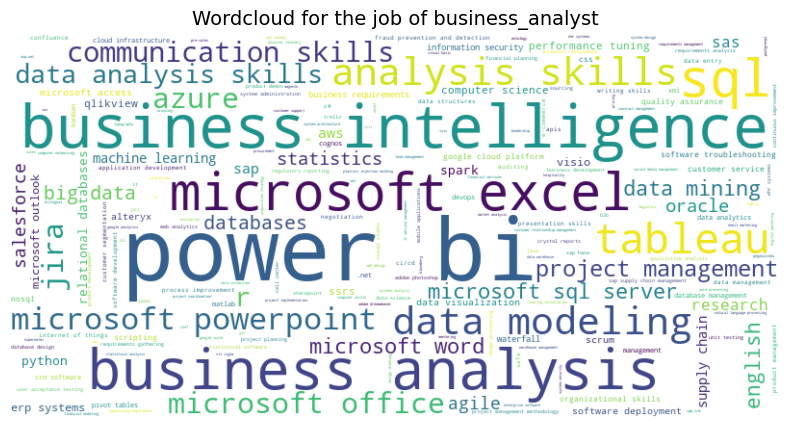

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


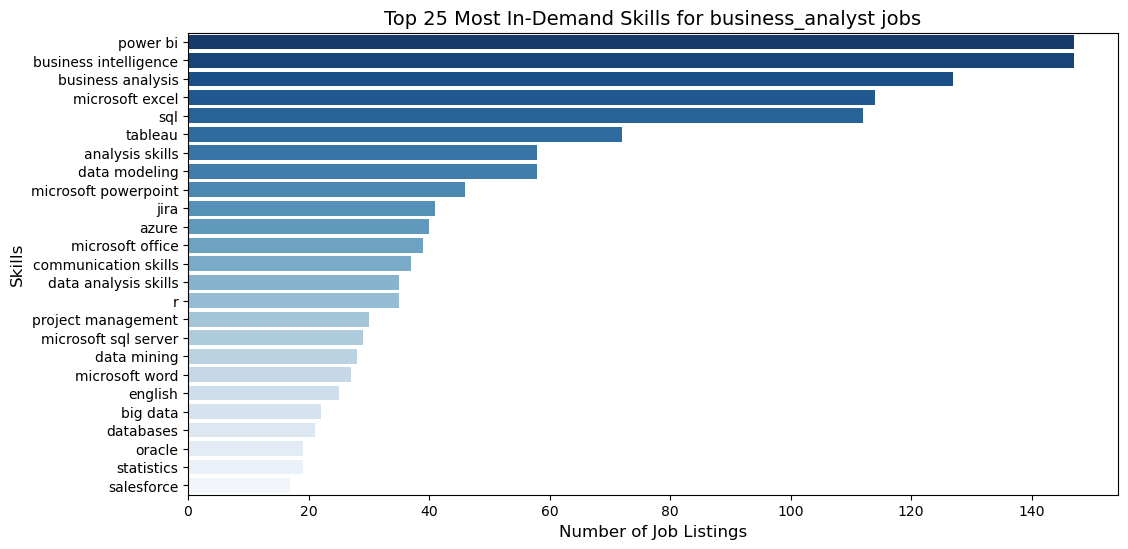

In [77]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [79]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                                    company_name  salary_lpa
23                        Alakmalak Technologies       48.00
279                         TechExe It Solutions       48.00
229             Primacy infotech Private Limited       42.48
0                         ABM Knowledgeware Ltd.       42.00
202                Neptunus Power Plant Services       42.00
182                                        MAKRO       42.00
173                                 Leap Finance       42.00
98                           Digital iTechnology       36.00
176  Leverage Business Solutions Private Limited       30.00
170                                 Lam Research       30.00


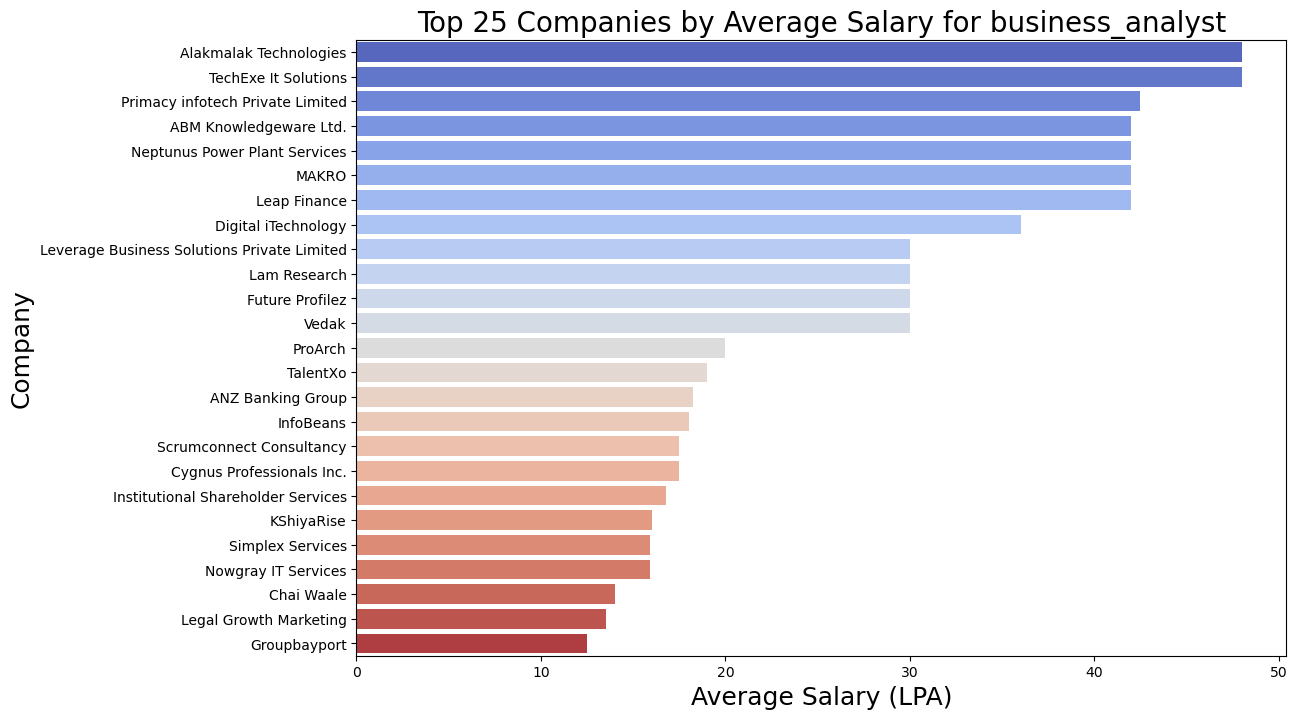

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

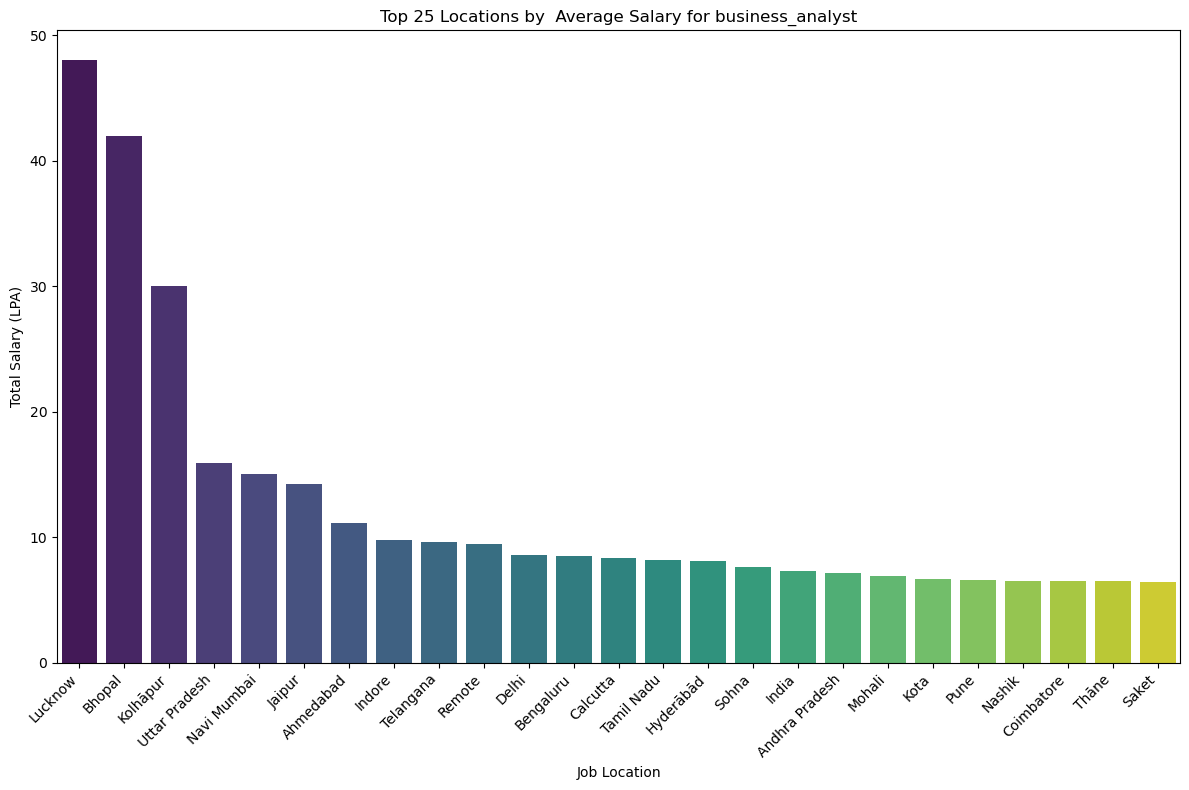

In [82]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

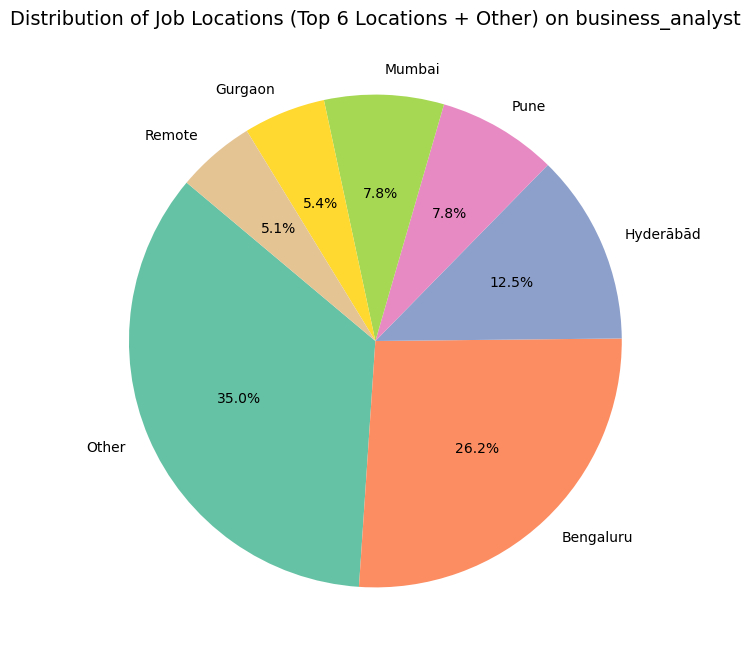

In [83]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

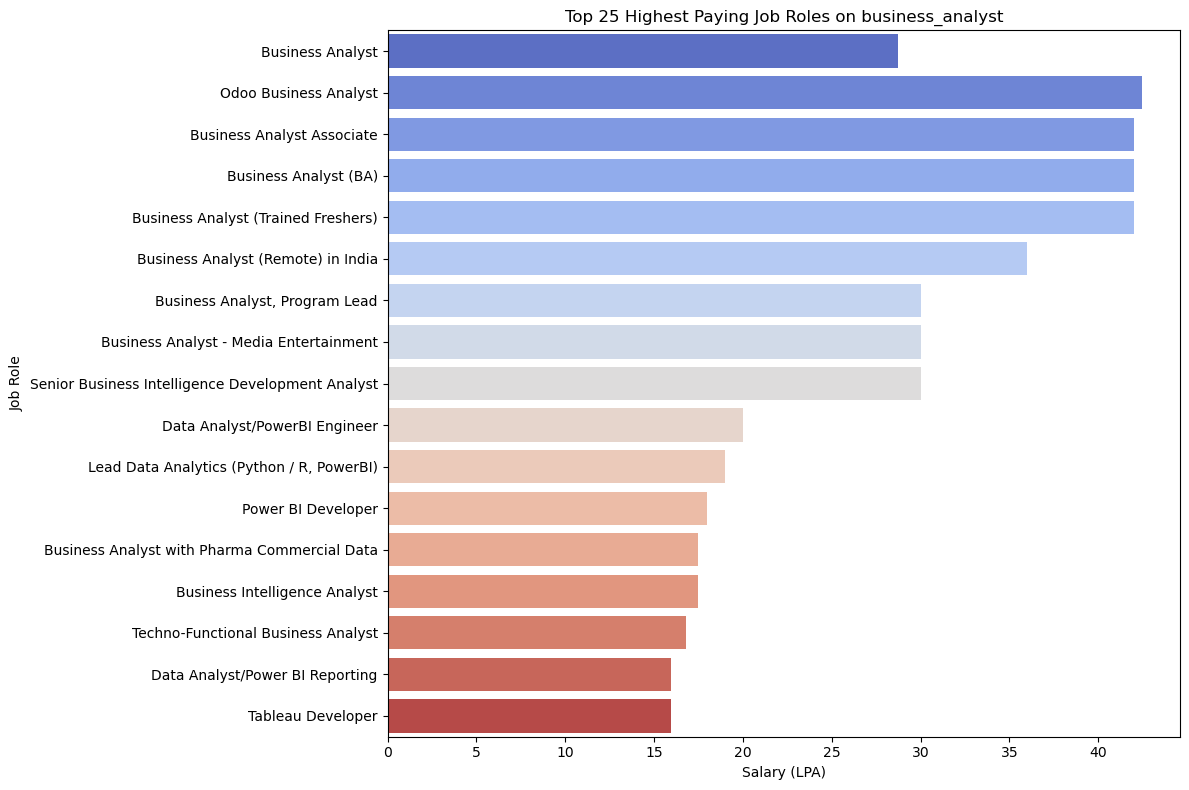

In [85]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [87]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_11256\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


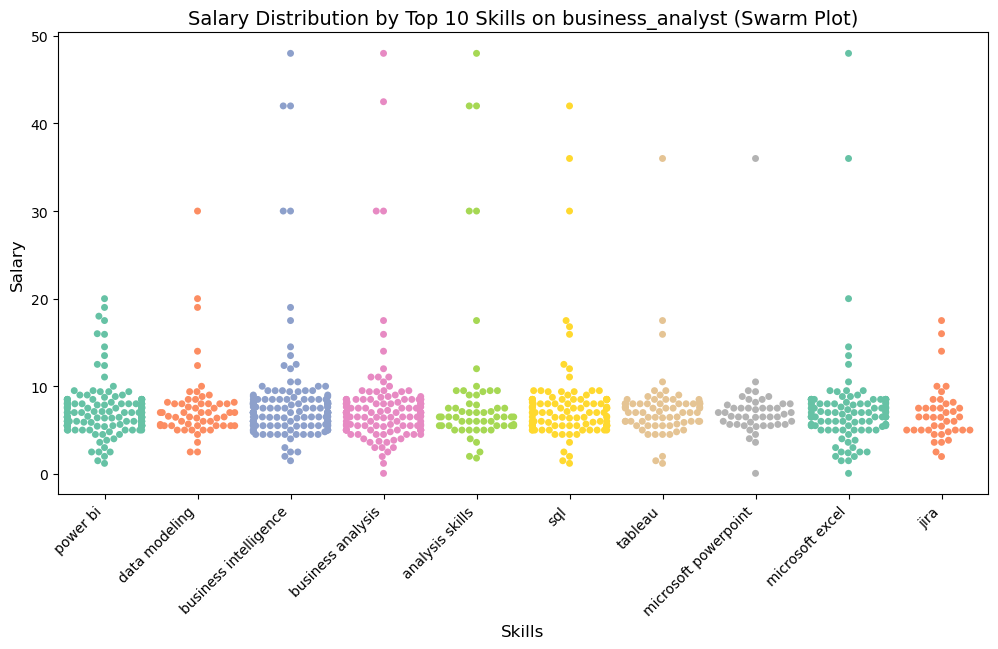

In [88]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

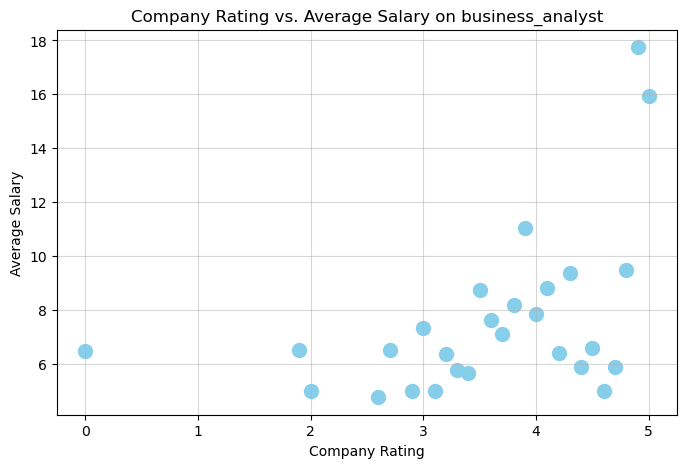

In [90]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [91]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.16646270862658682